In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load heart data
df = pd.read_csv('haberman.csv')
df.head()

,age,op_year,ax_nodes,target
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [86]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=24)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score

# Fit and predict test class probabilities
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for f0.5, f1, and f2 scores at different prob. thresholds
f1_scores = []
f0_5_scores = []
f2_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(2)
        else:
            y_test_preds.append(1)
            
    f1 = f1_score(y_test, y_test_preds)
    f0_5 = fbeta_score(y_test, y_test_preds, beta=0.5)
    f2 = fbeta_score(y_test, y_test_preds, beta=2)
        
    f1_scores.append(f1)
    f0_5_scores.append(f0_5)
    f2_scores.append(f2)

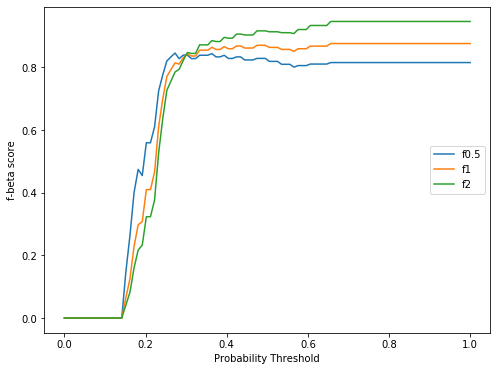

In [97]:
# Plot f_beta curves

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(probability_thresholds, f0_5_scores , label='f0.5')
ax.plot(probability_thresholds, f1_scores, label='f1')
ax.plot(probability_thresholds, f2_scores, label='f2')
ax.set_xlabel('Probability Threshold')
ax.set_ylabel('f-beta score')
ax.legend(loc='center right');